In [1]:
# Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df = pd.read_csv("players_20.csv")
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [114]:
# Simplify the data by removing unnecessary columns
no_need_cols = [
    'player_url',
    'long_name',
    'body_type',
    'dob',
    'real_face',
    'release_clause_eur',
    'player_tags',
    'team_position',
    'team_jersey_number',
    'loaned_from',
    'joined',
    'contract_valid_unti',
    'nation_position',
    'nation_jersey_number',
    'international_reputation',
    'contract_valid_until',
    'value_eur',
    'wage_eur'
]

for cl in df.columns:
    if cl in no_need_cols:
        del df[cl]

df.head()

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,...,gk_Shot_Stopper,gk_Sweeper,df_centre_backs,df_wing_backs,cmf_playmaker,cdm_destroyer,cmf_box_to_box,left_wing_forward,right_wing_forward,center_forward
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,"RW, CF, ST",...,NaN,NaN,55.675676,78.451613,91.354839,72.060606,85.933333,98.454545,83.800,73.481481
1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,"ST, LW",...,NaN,NaN,59.081081,75.451613,82.903226,73.545455,81.800000,94.030303,79.300,80.370370
2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,"LW, CAM",...,NaN,NaN,51.675676,76.838710,86.838710,67.212121,84.066667,95.787879,81.450,67.777778
3,200389,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,GK,...,76.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,"LW, CF",...,NaN,NaN,52.135135,77.516129,85.225806,70.454545,84.133333,94.151515,79.975,67.185185


In [108]:
#  Best GoalKeeper
# weights
a = 0.5
b = 1
c = 1.5
d = 2

# Ideal GK = One good at stopping shots and good with his feet(passing, clearing)
# Ideal Shot Stopper GK chrachteristics
df['gk_Shot_Stopper'] = (a*df.gk_speed + a*df.power_jumping + b*df.movement_reactions + b*df.mentality_composure + b*df.power_strength + c*df.gk_positioning + c*df.gk_diving + c*df.gk_reflexes + c*df.gk_handling)/(4*a + 1*b + 4*c + 1*d)
df['gk_Sweeper'] =( a*df.gk_speed + a*df.power_jumping + b*df.gk_kicking + b + df.mentality_vision + b*df.mentality_composure + b*df.movement_reactions + b*df.power_strength + c*df.gk_diving + c*df.gk_reflexes + c*df.gk_handling + d*df.gk_positioning)/(2*a + 5*b + 3*c + 1*d)


Text(0, 0.5, 'Shot Stopping Score')

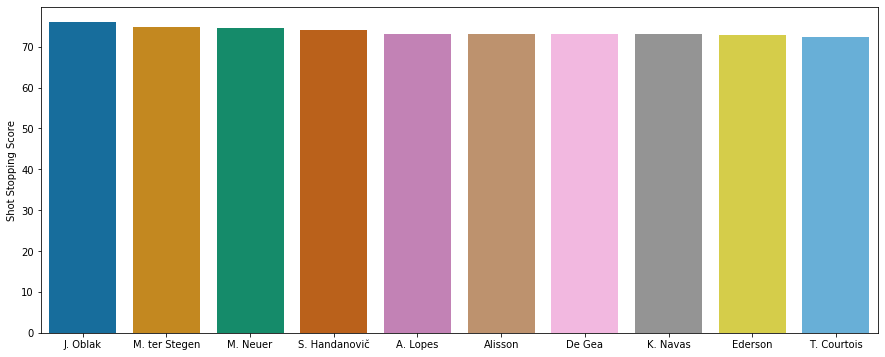

In [102]:
# make the data sequential and plot
plt.figure(figsize=(15,6))
sd = df.sort_values('gk_Shot_Stopper', ascending=False)[:10]
x1 = np.array(list(sd['short_name']))
y1 = np.array(list(sd['gk_Shot_Stopper']))
sns.barplot(x1, y1, palette= "colorblind")
plt.ylabel("Shot Stopping Score")

Text(0, 0.5, 'Sweeping Score')

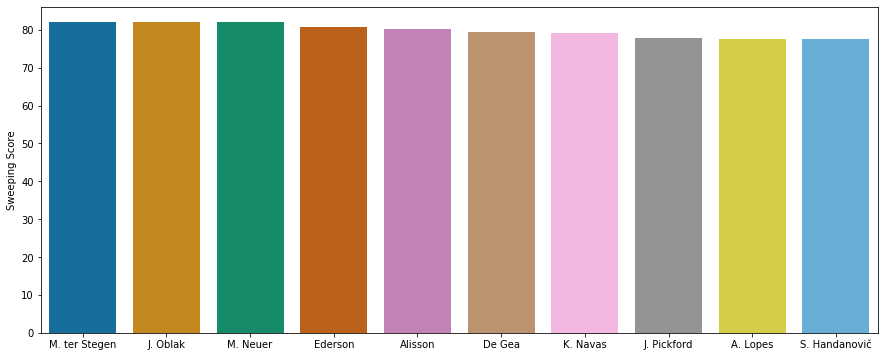

In [103]:
plt.figure(figsize=(15,6))
sd = df.sort_values('gk_Sweeper', ascending=False)[:10]
x2 = np.array(list(sd['short_name']))
y2 = np.array(list(sd['gk_Sweeper']))
sns.barplot(x2, y2, palette= "colorblind")
plt.ylabel("Sweeping Score")

In [111]:
df['df_centre_backs'] = (a*df.skill_long_passing +a*df.passing + a*df.movement_acceleration + a*df.pace + b*df.mentality_composure + c*df.mentality_interceptions + d*df.defending + d*df.defending_sliding_tackle + d*df.defending_standing_tackle + b*df.power_stamina + d*df.power_jumping + d*df.attacking_heading_accuracy + d*df.defending_marking + c*df.mentality_aggression)/(3*a + 2*b + 2*c + 6*d)
df['df_wing_backs']   = (b*df.dribbling + a*df.mentality_vision + b*df.defending + b*df.defending_marking + b*df.skill_ball_control + b*df.defending_standing_tackle + b*df.attacking_short_passing + c*df.attacking_crossing + c*df.skill_long_passing + d*df.movement_acceleration + d*df.pace + d*df.power_stamina)/(1*a + 6*b + 2*c + 3*d)

Text(0, 0.5, 'defending score')

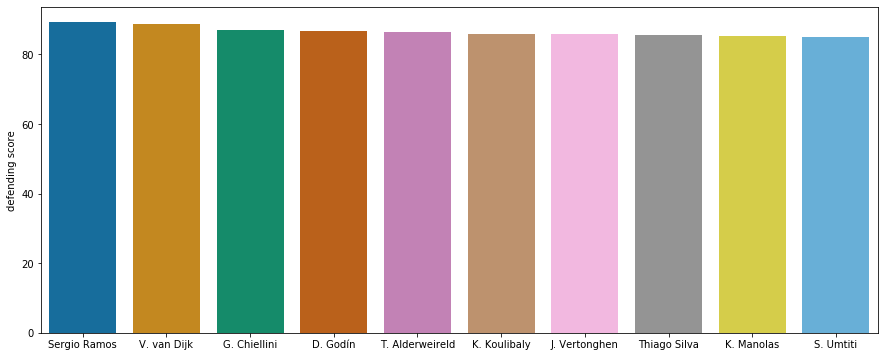

In [7]:
plt.figure(figsize=(15,6))
sd = df[(df['player_positions'] == 'CB')].sort_values('df_centre_backs', ascending=False)[:10]
x3 = np.array(list(sd['short_name']))
y3 = np.array(list(sd['df_centre_backs']))
sns.barplot(x3, y3, palette= "colorblind")
plt.ylabel("defending score")

Text(0, 0.5, 'defending score')

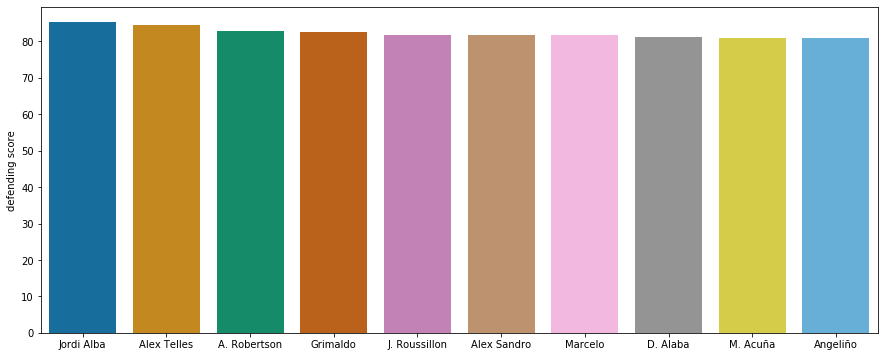

In [112]:
plt.figure(figsize=(15,6))
sd = df[(df['player_positions'].str.contains('LB'))].sort_values('df_wing_backs', ascending=False)[:10]
x4 = np.array(list(sd['short_name']))
y4 = np.array(list(sd['df_wing_backs']))
sns.barplot(x4, y4, palette= "colorblind")
plt.ylabel("defending score")

Text(0, 0.5, 'defending score')

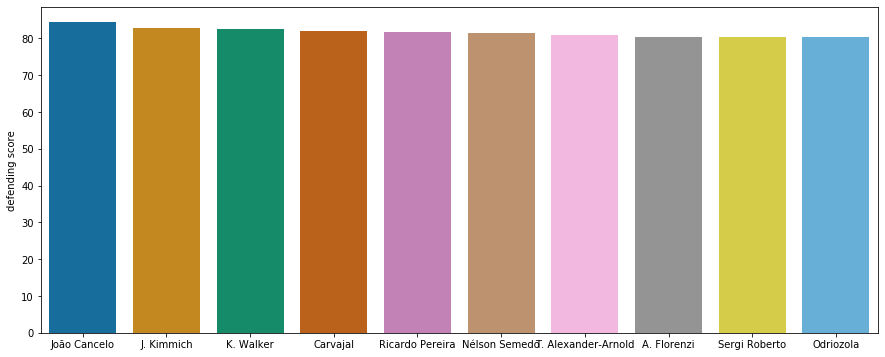

In [113]:
plt.figure(figsize=(15,6))
sd = df[(df['player_positions'].str.contains('RB'))].sort_values('df_wing_backs', ascending=False)[:10]
x5 = np.array(list(sd['short_name']))
y5 = np.array(list(sd['df_wing_backs']))
sns.barplot(x5, y5, palette= "colorblind")
plt.ylabel("defending score")

In [99]:
# midfielders
df['cmf_playmaker'] = (d*df.skill_ball_control + b*df.dribbling + a*df.defending_marking + b*df.movement_reactions + d*df.mentality_vision + b*df.mentality_positioning + c*df.attacking_crossing + d*df.attacking_short_passing + c*df.skill_long_passing + c*df.skill_curve + c*df.skill_fk_accuracy)/(1*a + 3*b + 4*c + 3*d)
df['cdm_destroyer'] = (c*df.movement_balance + b*df.power_jumping + c*df.power_strength + c*df.physic + d*df.power_stamina + a*df.movement_acceleration + d*df.passing + c*df.mentality_aggression + d*df.movement_reactions + b*df.defending_marking + b*df.defending_standing_tackle + b*df.defending_sliding_tackle + b*df.mentality_interceptions)/(2*a + 5*b + 3*c + 3*d)
df['cmf_box_to_box'] = (b*df.weak_foot + d*df.skill_ball_control + a*df.dribbling + a*df.defending_marking + a*df.movement_reactions + c*df.mentality_vision + c*df.mentality_composure + d*df.passing + d*df.skill_long_passing + d*df.power_stamina + b*df.movement_acceleration + b*df.pace)/(2*c + 4*d + 2*a + 3*b)

Text(0, 0.5, 'playmaking score')

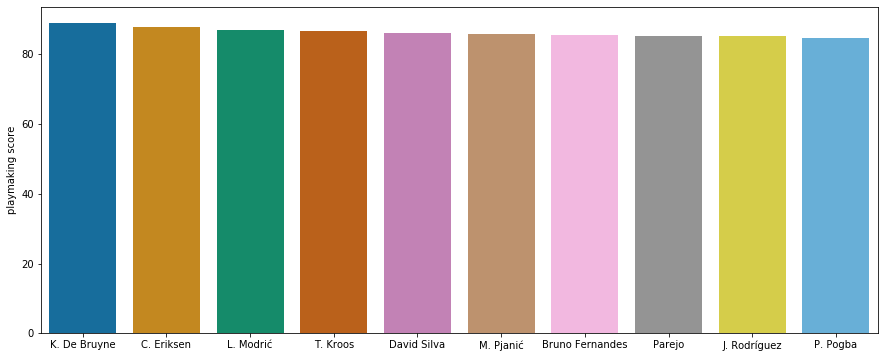

In [88]:
plt.figure(figsize=(15,6))
sd = df[(df['player_positions'].str.contains('CM'))].sort_values('cmf_playmaker', ascending=False)[:10]
x6 = np.array(list(sd['short_name']))
y6 = np.array(list(sd['cmf_playmaker']))
sns.barplot(x6, y6, palette= "colorblind")
plt.ylabel("playmaking score")

Text(0, 0.5, 'interception score')

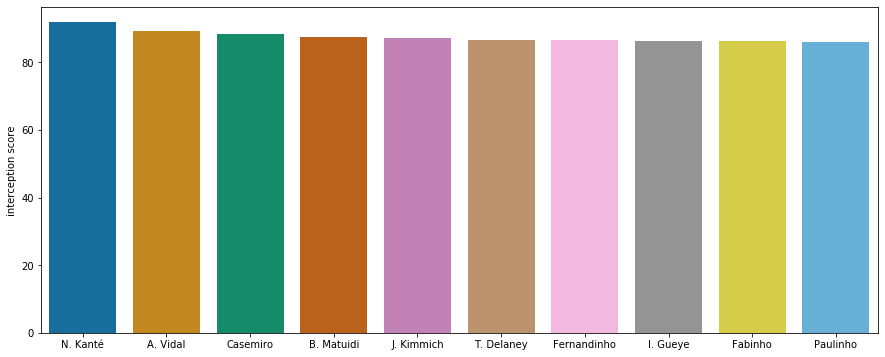

In [100]:
plt.figure(figsize=(15,6))
sd = df[(df['player_positions'].str.contains('CDM'))].sort_values('cdm_destroyer', ascending=False)[:10]
x7 = np.array(list(sd['short_name']))
y7 = np.array(list(sd['cdm_destroyer']))
sns.barplot(x7, y7, palette= "colorblind")
plt.ylabel("interception score")

Text(0, 0.5, 'pressing score')

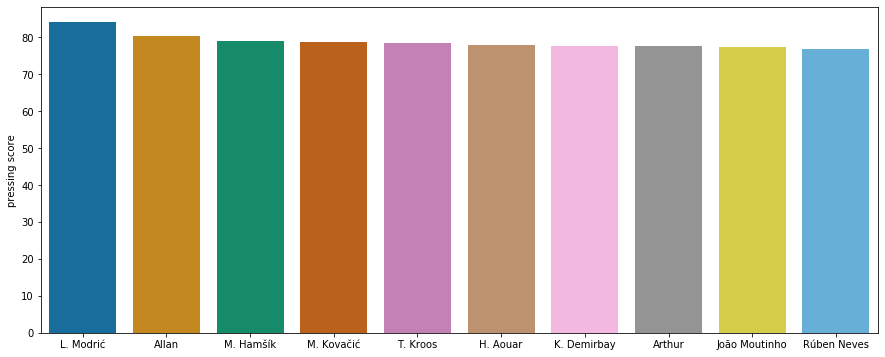

In [86]:
plt.figure(figsize=(15,6))
sd = df[(df['player_positions'].str.contains('CM'))].sort_values('cmf_box_to_box', ascending=False)[:10]
x8 = np.array(list(sd['short_name']))
y8 = np.array(list(sd['cmf_box_to_box']))
sns.barplot(x6, y6, palette= "colorblind")
plt.ylabel("pressing score")

In [106]:
df['left_wing_forward'] = (a*df.weak_foot + c*df.skill_ball_control + c*df.dribbling + d*df.pace + d*df.movement_acceleration + b*df.mentality_vision + b*df.attacking_crossing + b*df.attacking_short_passing + b*df.skill_long_passing + b*df.mentality_aggression + b*df.movement_agility + a*df.skill_curve + c*df.power_long_shots + b*df.skill_fk_accuracy + d*df.attacking_finishing)/(a*2 + 7*b + 3*c + 2*d)
df['right_wing_forward'] = (a*df.weak_foot + d*df.skill_ball_control + c*df.dribbling + c*df.pace + c*df.movement_acceleration + c*df.mentality_vision + b*df.attacking_crossing + b*df.attacking_short_passing + b*df.skill_long_passing + b*df.mentality_aggression + c*df.movement_agility + b*df.skill_curve + c*df.power_long_shots + b*df.skill_fk_accuracy + c*df.attacking_finishing)/(a*2 + 10*b + 2*c + 3*d)
df['center_forward'] = (a*df.weak_foot + a*df.skill_ball_control + a*df.mentality_vision + b*df.mentality_aggression + a*df.skill_curve + d*df.power_long_shots + d*df.physic + c*df.attacking_finishing + d*df.attacking_heading_accuracy + c*df.power_jumping + b*df.dribbling)/(2*a + 2*b + 3*c + 3*d)

Text(0, 0.5, 'Winger score')

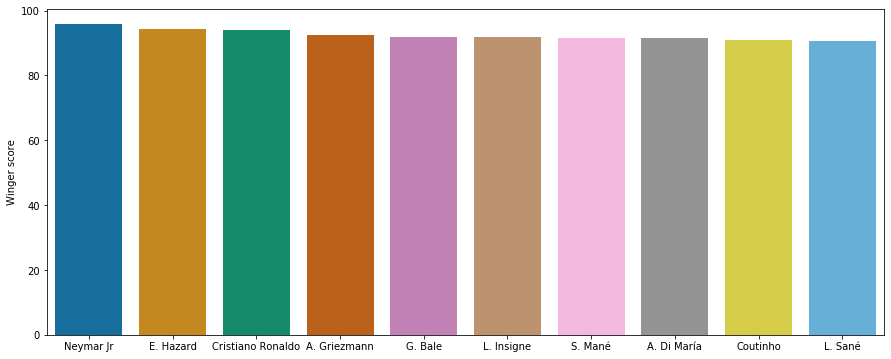

In [97]:
plt.figure(figsize=(15,6))
sd = df[(df['player_positions'].str.contains('LW'))].sort_values('left_wing_forward', ascending=False)[:10]
x9 = np.array(list(sd['short_name']))
y9 = np.array(list(sd['left_wing_forward']))
sns.barplot(x9, y9, palette= "colorblind")
plt.ylabel("Winger score")

Text(0, 0.5, 'pressing score')

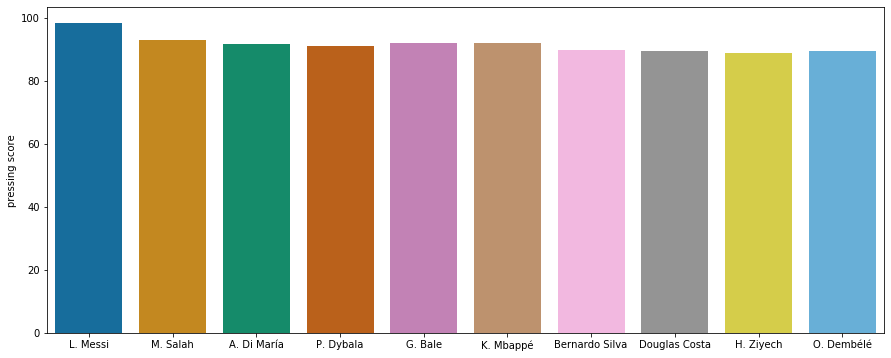

In [93]:
plt.figure(figsize=(15,6))
sd = df[(df['player_positions'].str.contains('RW'))].sort_values('right_wing_forward', ascending=False)[:10]
x10 = np.array(list(sd['short_name']))
y10 = np.array(list(sd['left_wing_forward']))
sns.barplot(x10, y10, palette= "colorblind")
plt.ylabel("Winger score")

Text(0, 0.5, 'Striker score')

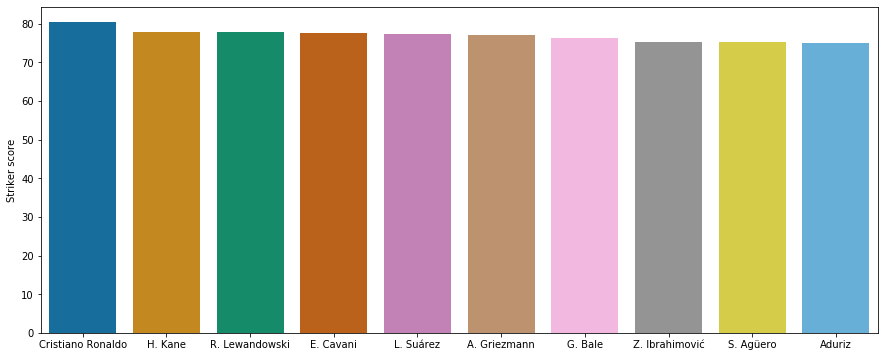

In [107]:
plt.figure(figsize=(15,6))
sd = df[(df['player_positions'].str.contains('ST'))].sort_values('center_forward', ascending=False)[:10]
x11 = np.array(list(sd['short_name']))
y11 = np.array(list(sd['center_forward']))
sns.barplot(x11, y11, palette= "colorblind")
plt.ylabel("Striker score")

# Result:
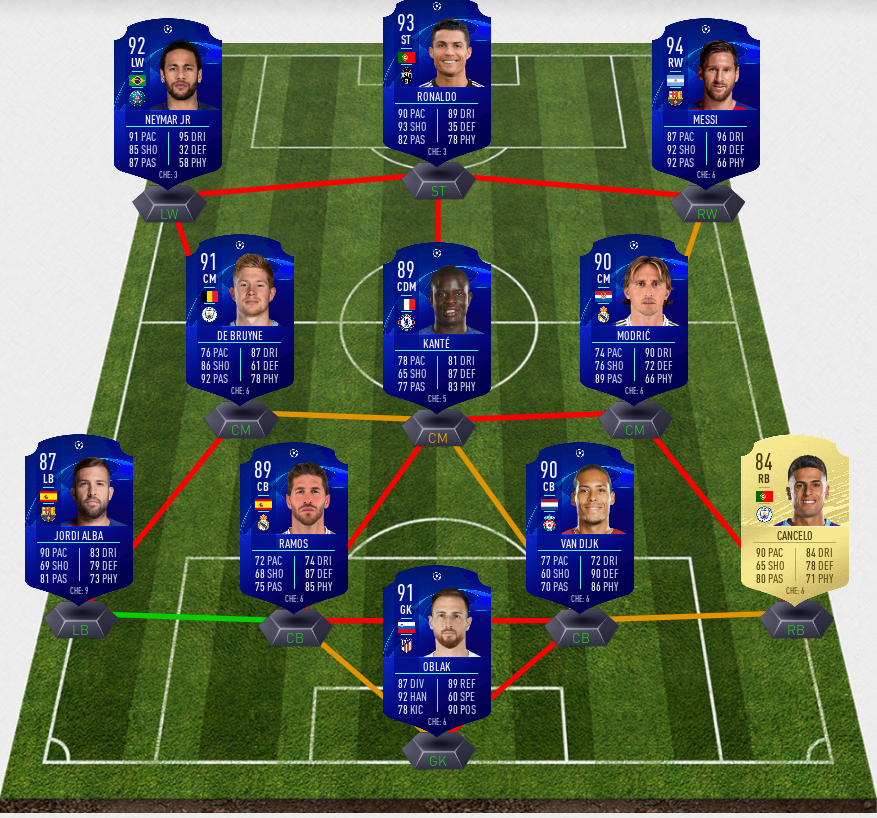